In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# - define optimal deception detection strategy when event probabilities differ
# 	- when deception event probability is very low, you're most accurate by just assuming everything is truthful
# 	- when deception event probability is very high, you're most accurate by assuming everything is a deception
# 	the problem is that we do not know the true temporal probability of these events; in the cards game it is completely random

# 	-> simulate lying across trials according to different probabilities; inject lies randomly
# 	-> set up models that assume different lie probailities | different conditions --> apply model to large number of events, compare accuracy to heuristic approach
# 		- then assume random temporal distribution of when the agent says it detects lies
# 		- variation: agent uses heuristics that says after X trials of the same type with consecutive colour reports it "detects" a lie -> expensive, because relies on memory
# 			-> test how much exposure is needed to consolidate learned effect?

In [ ]:
# demonstrates type 1 and type 2 error judgments when have very small sample!

In [2]:
from scripts.data_processing import process_trials_from_df

In [3]:
# set1 SAME players condition actual past participant lies

with open('data/as31_lies.json', 'r', encoding='utf-8') as f:
    as31_lies = json.load(f)
    
with open('data/bs02_lies.json', 'r', encoding='utf-8') as f:
    bs02_lies = json.load(f)

In [4]:
# set1 SAME players condition block trials: p2b_s11, p2a_s31, p2b_s02

with open('./trial_setups/p2b_s11.json', 'r') as f:
    bs11 = json.load(f)
#     bs11 = pd.DataFrame.from_dict(bs11)
#     bs11 = process_trials_from_df(bs11, 7)

with open('./trial_setups/p2b_s02.json', 'r') as f:
    bs02 = json.load(f)
#     bs02 = pd.DataFrame.from_dict(bs02)
#     bs02 = process_trials_from_df(bs02, 7)
    
with open('./trial_setups/p2a_s31.json', 'r') as f:
    as31 = json.load(f)
#     as31 = pd.DataFrame.from_dict(as31)
#     as31 = process_trials_from_df(as31, 7)

In [5]:
def reset_trials_count():
    return {1: {'blue': 0, 'red': 0},
                    2: {'blue': 0, 'red': 0},
                    3: {'blue': 0, 'red': 0},
                    4: {'blue': 0, 'red': 0},
                    5: {'blue': 0, 'red': 0},
                    6: {'blue': 0, 'red': 0}}

In [6]:
n_blue_per_trial = reset_trials_count()

In [7]:
n_blue_per_trial

{1: {'blue': 0, 'red': 0},
 2: {'blue': 0, 'red': 0},
 3: {'blue': 0, 'red': 0},
 4: {'blue': 0, 'red': 0},
 5: {'blue': 0, 'red': 0},
 6: {'blue': 0, 'red': 0}}

In [8]:
# OPTIMAL AGENT W/SAME PLAYER ALGORITHM

# 1. compute likelihood that blue card is reported (if red, then no suspicion) in given trial setup
# 2. compute likelihood that the blue report occurs | total # trials with same setup 
# 3. if p(blue) > threshold, report lie; else no lie

def check_lie_prob(n_cards, n_red, outcome):
    p_blue_trial = (n_cards - n_red) / n_cards
    
    if outcome == 1:
        n_blue_per_trial[n_red]['blue'] += 1
    elif outcome == -1:
        n_blue_per_trial[n_red]['red'] += 1
    else:
        raise ValueError("Unknown report colour value input")
    
    n_trials = n_blue_per_trial[n_red]['blue'] + n_blue_per_trial[n_red]['red']
    print("n trials with setup", n_trials)
    
    if n_trials == 1:
        if outcome == 1:
            print("p blue in trial", p_blue_trial)
            return 1 - p_blue_trial
        else:
            return p_blue_trial
    
    if (n_blue_per_trial[n_red]['blue'] == 0) | (n_blue_per_trial[n_red]['red'] == 0):
        n_combinations = 1
#         print("n combi 1 colour 0 n", n_combinations)
    elif (n_blue_per_trial[n_red]['blue'] == 1) | (n_blue_per_trial[n_red]['red'] == 1):
        n_combinations = (n_trials * (n_trials + 1))/2
#         print("n combi 1 colour 1 n", n_combinations)
    else:
        n_combinations = ((n_trials - 1) * n_trials)/2
#         print("n combi cols >1n", n_combinations)
        
    n_trials_blue = n_blue_per_trial[n_red]['blue']

    p_red_trial = n_red / n_cards
    
#     print("N blue trials", n_trials_blue)
#     print("p red", p_red_trial)
#     print("p red given trials", p_red_trial ** (n_trials - n_trials_blue))
#     print("p blue given trials", p_blue_trial ** n_trials_blue)
    return (p_blue_trial ** n_trials_blue) * (p_red_trial ** (n_trials - n_trials_blue)) * n_combinations

In [9]:
def check_lie_prob_nonc(n_cards, n_red, outcome):
    p_blue_trial = (n_cards - n_red) / n_cards
    
    if outcome == 1:
        n_blue_per_trial[n_red]['blue'] += 1
    elif outcome == -1:
        n_blue_per_trial[n_red]['red'] += 1
    else:
        raise ValueError("Unknown report colour value input")
    
    n_trials = n_blue_per_trial[n_red]['blue'] + n_blue_per_trial[n_red]['red']
    print("n trials with setup", n_trials)
    
    if n_trials == 1:
        if outcome == 1:
            print("p blue in trial", p_blue_trial)
            return 1 - p_blue_trial
        else:
            return p_blue_trial
    
    if (n_blue_per_trial[n_red]['blue'] == 0) | (n_blue_per_trial[n_red]['red'] == 0):
        n_combinations = 1
#         print("n combi 1 colour 0 n", n_combinations)
    elif (n_blue_per_trial[n_red]['blue'] == 1) | (n_blue_per_trial[n_red]['red'] == 1):
        n_combinations = (n_trials * (n_trials + 1))/2
#         print("n combi 1 colour 1 n", n_combinations)
    else:
        n_combinations = ((n_trials - 1) * n_trials)/2
#         print("n combi cols >1n", n_combinations)
        
    n_trials_blue = n_blue_per_trial[n_red]['blue']

    p_red_trial = n_red / n_cards
    
#     print("N blue trials", n_trials_blue)
#     print("p red", p_red_trial)
#     print("p red given trials", p_red_trial ** (n_trials - n_trials_blue))
#     print("p blue given trials", p_blue_trial ** n_trials_blue)
    return (p_blue_trial ** n_trials_blue) * (p_red_trial ** (n_trials - n_trials_blue)) #* n_combinations

In [10]:
def check_lie_prob_signed(n_cards, n_red, outcome):
    p_blue_trial = (n_cards - n_red) / n_cards
    
    if outcome == 1:
        n_blue_per_trial[n_red]['blue'] += 1
    elif outcome == -1:
        n_blue_per_trial[n_red]['red'] += 1
    else:
        raise ValueError("Unknown report colour value input")
    
    n_trials = n_blue_per_trial[n_red]['blue'] + n_blue_per_trial[n_red]['red']
    print("n trials with setup", n_trials)
    
    if n_trials == 1:
        if outcome == 1:
            print("p blue in trial", p_blue_trial)
            return 1 - p_blue_trial
        else:
            return 1 # because we assume people only lie rationally, if outcome is -1 (red) it should not raise suspicion (very high likelihood)
    
    if (n_blue_per_trial[n_red]['blue'] == 0) | (n_blue_per_trial[n_red]['red'] == 0):
        n_combinations = 1
    elif (n_blue_per_trial[n_red]['blue'] == 1) | (n_blue_per_trial[n_red]['red'] == 1):
        n_combinations = (n_trials * (n_trials + 1))/2
    else:
        n_combinations = ((n_trials - 1) * n_trials)/2
        
    n_trials_blue = n_blue_per_trial[n_red]['blue']

    p_red_trial = n_red / n_cards
    
    if outcome == -1:
        return 1    
    return (p_blue_trial ** n_trials_blue) * (p_red_trial ** (n_trials - n_trials_blue)) * n_combinations

In [11]:
n_cards = 7

threshold = 0.1

trials = as31

In [ ]:
lie_detect = []

for i, t in enumerate(trials):
    print("TRIAL", i)
    p = check_lie_prob(n_cards, t['n_red'], t['outcome'])
    print("event prob", p)
    if p < threshold:
        lie_detect.append(1)
    else:
        lie_detect.append(0)

In [ ]:
list(zip([i for i in range(len(lie_detect))], lie_detect, as31_lies))

In [12]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score

In [ ]:
precision_score(as31_lies, lie_detect)

In [ ]:
recall_score(as31_lies, lie_detect)

In [196]:
n_cards = 7

threshold = 0.1

trials = bs02

In [10]:
lie_detect = []

for i, t in enumerate(trials):
    print("TRIAL", i)
    p = check_lie_prob(n_cards, t['n_red'], t['outcome'])
    print("event prob", p)
    if p < threshold:
        lie_detect.append(1)
    else:
        lie_detect.append(0)

TRIAL 0
n trials with setup 1
event prob 1
TRIAL 1
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 2
n trials with setup 2
event prob 0.6122448979591837
TRIAL 3
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 4
n trials with setup 2
event prob 0.36734693877551017
TRIAL 5
n trials with setup 1
p blue in trial 0.42857142857142855
event prob 0.5714285714285714
TRIAL 6
n trials with setup 3
event prob 0.10495626822157433
TRIAL 7
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 8
n trials with setup 3
event prob 0.3498542274052478
TRIAL 9
n trials with setup 4
event prob 0.16659725114535606
TRIAL 10
n trials with setup 5
event prob 0.07139882191943832
TRIAL 11
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 12
n trials with setup 4
event prob 0.02498958767180341
TRIAL 13
n trials with setup 5
event prob 0.021419646

In [11]:
list(zip([i for i in range(len(lie_detect))], lie_detect, bs02_lies))

[(0, 0, 0),
 (1, 0, 0),
 (2, 0, 0),
 (3, 0, 0),
 (4, 0, 1),
 (5, 0, 1),
 (6, 0, 1),
 (7, 0, 0),
 (8, 0, 1),
 (9, 0, 1),
 (10, 1, 1),
 (11, 0, 0),
 (12, 1, 1),
 (13, 1, 0),
 (14, 0, 1),
 (15, 0, 0),
 (16, 1, 1),
 (17, 1, 1),
 (18, 1, 1),
 (19, 1, 1),
 (20, 1, 0),
 (21, 0, 0),
 (22, 1, 1),
 (23, 0, 0),
 (24, 0, 1),
 (25, 0, 0),
 (26, 1, 0),
 (27, 0, 0),
 (28, 1, 1),
 (29, 1, 0)]

In [15]:
precision_score(bs02_lies, lie_detect)

0.6666666666666666

In [16]:
recall_score(bs02_lies, lie_detect)

0.5333333333333333

In [17]:
n_blue_per_trial

{1: {'blue': 5, 'red': 0},
 2: {'blue': 2, 'red': 0},
 3: {'blue': 2, 'red': 0},
 4: {'blue': 2, 'red': 0},
 5: {'blue': 8, 'red': 2},
 6: {'blue': 7, 'red': 2}}

In [ ]:
# shows that most rational probabilistic agent is not good at accurate lie detection; a biased approach may (sometimes) be better to improve recall in the security context
# can we show that in situations with low event frequencies, a biased model is more accurate than a rational one?

## Show lie detection accuracy under different probability thresholds

In [13]:
thresholds = [0.01, 0.05, 0.1, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.8, 1]

In [14]:
len(thresholds)

17

In [15]:
n_cards = 7

trials = bs02

In [200]:
n_blue_per_trial = reset_trials_count()

In [ ]:
# bs11.extend(bs02)
# bs11.extend(as31)

In [16]:
precision = []
recall = []
accuracy = []

for th in thresholds:
    lie_detect = []
    for i, t in enumerate(trials):
        print("TRIAL", i)
        p = check_lie_prob(n_cards, t['n_red'], t['outcome'])
        print("event prob", p)
        if p < th:
            lie_detect.append(1)
        else:
            lie_detect.append(0)
    precision.append(precision_score(bs02_lies, lie_detect))
    recall.append(recall_score(bs02_lies, lie_detect))
    accuracy.append(accuracy_score(bs02_lies, lie_detect))
    
    # reset trial counts at end of each iteration
    n_blue_per_trial = {1: {'blue': 0, 'red': 0},
                    2: {'blue': 0, 'red': 0},
                    3: {'blue': 0, 'red': 0},
                    4: {'blue': 0, 'red': 0},
                    5: {'blue': 0, 'red': 0},
                    6: {'blue': 0, 'red': 0}}

TRIAL 0
n trials with setup 1
event prob 0.14285714285714285
TRIAL 1
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 2
n trials with setup 2
event prob 0.6122448979591837
TRIAL 3
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 4
n trials with setup 2
event prob 0.36734693877551017
TRIAL 5
n trials with setup 1
p blue in trial 0.42857142857142855
event prob 0.5714285714285714
TRIAL 6
n trials with setup 3
event prob 0.10495626822157433
TRIAL 7
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 8
n trials with setup 3
event prob 0.3498542274052478
TRIAL 9
n trials with setup 4
event prob 0.16659725114535606
TRIAL 10
n trials with setup 5
event prob 0.07139882191943832
TRIAL 11
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 12
n trials with setup 4
event prob 0.02498958767180341
TRIAL 13
n trials with setup 5
even

n trials with setup 3
event prob 0.629737609329446
TRIAL 16
n trials with setup 6
event prob 0.004589924266249605
TRIAL 17
n trials with setup 7
event prob 0.000917984853249921
TRIAL 18
n trials with setup 6
event prob 0.028559528767775323
TRIAL 19
n trials with setup 7
event prob 0.010879820482962026
TRIAL 20
n trials with setup 8
event prob 0.003996668748843193
TRIAL 21
n trials with setup 4
event prob 0.5397750937109537
TRIAL 22
n trials with setup 8
event prob 0.0001748542577618897
TRIAL 23
n trials with setup 2
event prob 0.32653061224489793
TRIAL 24
n trials with setup 2
event prob 0.18367346938775508
TRIAL 25
n trials with setup 5
event prob 0.46266436603796024
TRIAL 26
n trials with setup 9
event prob 0.0028547633920308524
TRIAL 27
n trials with setup 2
event prob 0.5102040816326531
TRIAL 28
n trials with setup 9
event prob 3.211608816034709e-05
TRIAL 29
n trials with setup 10
event prob 0.001019558354296733
TRIAL 0
n trials with setup 1
event prob 0.14285714285714285
TRIAL 1
n

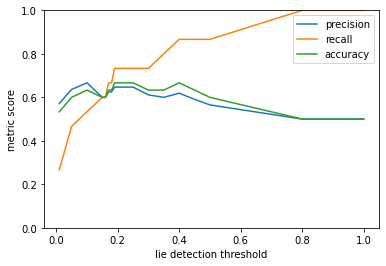

In [17]:
p = sns.lineplot(x=thresholds, y=precision)
p.set(ylim=(0,1), xlabel="lie detection threshold", ylabel="metric score")

p = sns.lineplot(x=thresholds, y=recall)
p = sns.lineplot(x=thresholds, y=accuracy)
p.legend(['precision', 'recall', 'accuracy'])

In [18]:
precision = []
recall = []
accuracy = []

for th in thresholds:
    lie_detect = []
    for i, t in enumerate(trials):
        print("TRIAL", i)
        p = check_lie_prob_nonc(n_cards, t['n_red'], t['outcome'])
        print("event prob", p)
        if p < th:
            lie_detect.append(1)
        else:
            lie_detect.append(0)
    precision.append(precision_score(bs02_lies, lie_detect))
    recall.append(recall_score(bs02_lies, lie_detect))
    accuracy.append(accuracy_score(bs02_lies, lie_detect))
    
    # reset trial counts at end of each iteration
    n_blue_per_trial = {1: {'blue': 0, 'red': 0},
                    2: {'blue': 0, 'red': 0},
                    3: {'blue': 0, 'red': 0},
                    4: {'blue': 0, 'red': 0},
                    5: {'blue': 0, 'red': 0},
                    6: {'blue': 0, 'red': 0}}

TRIAL 0
n trials with setup 1
event prob 0.14285714285714285
TRIAL 1
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 2
n trials with setup 2
event prob 0.20408163265306123
TRIAL 3
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 4
n trials with setup 2
event prob 0.12244897959183672
TRIAL 5
n trials with setup 1
p blue in trial 0.42857142857142855
event prob 0.5714285714285714
TRIAL 6
n trials with setup 3
event prob 0.017492711370262388
TRIAL 7
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 8
n trials with setup 3
event prob 0.05830903790087463
TRIAL 9
n trials with setup 4
event prob 0.016659725114535607
TRIAL 10
n trials with setup 5
event prob 0.004759921461295888
TRIAL 11
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 12
n trials with setup 4
event prob 0.002498958767180341
TRIAL 13
n trials with setup 

TRIAL 29
n trials with setup 10
event prob 2.2656852317705177e-05
TRIAL 0
n trials with setup 1
event prob 0.14285714285714285
TRIAL 1
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 2
n trials with setup 2
event prob 0.20408163265306123
TRIAL 3
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 4
n trials with setup 2
event prob 0.12244897959183672
TRIAL 5
n trials with setup 1
p blue in trial 0.42857142857142855
event prob 0.5714285714285714
TRIAL 6
n trials with setup 3
event prob 0.017492711370262388
TRIAL 7
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 8
n trials with setup 3
event prob 0.05830903790087463
TRIAL 9
n trials with setup 4
event prob 0.016659725114535607
TRIAL 10
n trials with setup 5
event prob 0.004759921461295888
TRIAL 11
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 12
n trials with set

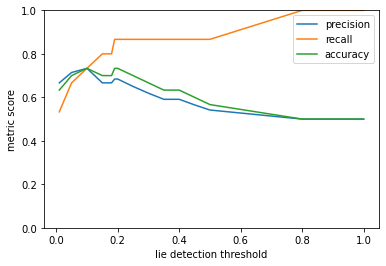

In [19]:
p = sns.lineplot(x=thresholds, y=precision)
p.set(ylim=(0,1), xlabel="lie detection threshold", ylabel="metric score")

p = sns.lineplot(x=thresholds, y=recall)
p = sns.lineplot(x=thresholds, y=accuracy)
p.legend(['precision', 'recall', 'accuracy'])

In [20]:
precision = []
recall = []
accuracy = []

for th in thresholds:
    lie_detect = []
    P = []
    for i, t in enumerate(trials):
        print("TRIAL", i)
        p = check_lie_prob_signed(n_cards, t['n_red'], t['outcome'])
        P.append(p)
        print("event prob", p)
        if p < th:
            lie_detect.append(1)
        else:
            lie_detect.append(0)
    precision.append(precision_score(bs02_lies, lie_detect))
    recall.append(recall_score(bs02_lies, lie_detect))
    accuracy.append(accuracy_score(bs02_lies, lie_detect))
    
    # reset trial counts at end of each iteration
    n_blue_per_trial = {1: {'blue': 0, 'red': 0},
                    2: {'blue': 0, 'red': 0},
                    3: {'blue': 0, 'red': 0},
                    4: {'blue': 0, 'red': 0},
                    5: {'blue': 0, 'red': 0},
                    6: {'blue': 0, 'red': 0}}

TRIAL 0
n trials with setup 1
event prob 1
TRIAL 1
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 2
n trials with setup 2
event prob 1
TRIAL 3
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 4
n trials with setup 2
event prob 0.36734693877551017
TRIAL 5
n trials with setup 1
p blue in trial 0.42857142857142855
event prob 0.5714285714285714
TRIAL 6
n trials with setup 3
event prob 0.10495626822157433
TRIAL 7
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 8
n trials with setup 3
event prob 0.3498542274052478
TRIAL 9
n trials with setup 4
event prob 0.16659725114535606
TRIAL 10
n trials with setup 5
event prob 0.07139882191943832
TRIAL 11
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 12
n trials with setup 4
event prob 0.02498958767180341
TRIAL 13
n trials with setup 5
event prob 1
TRIAL 14
n trials with set

event prob 0.001019558354296733
TRIAL 0
n trials with setup 1
event prob 1
TRIAL 1
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 2
n trials with setup 2
event prob 1
TRIAL 3
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 4
n trials with setup 2
event prob 0.36734693877551017
TRIAL 5
n trials with setup 1
p blue in trial 0.42857142857142855
event prob 0.5714285714285714
TRIAL 6
n trials with setup 3
event prob 0.10495626822157433
TRIAL 7
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 8
n trials with setup 3
event prob 0.3498542274052478
TRIAL 9
n trials with setup 4
event prob 0.16659725114535606
TRIAL 10
n trials with setup 5
event prob 0.07139882191943832
TRIAL 11
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 12
n trials with setup 4
event prob 0.02498958767180341
TRIAL 13
n trials with setup 5
event p

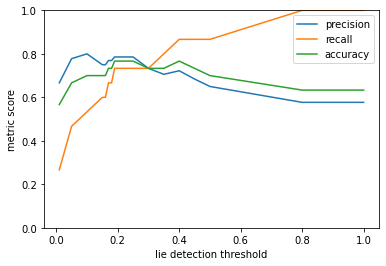

In [21]:
p = sns.lineplot(x=thresholds, y=precision)
p.set(ylim=(0,1), xlabel="lie detection threshold", ylabel="metric score")

p = sns.lineplot(x=thresholds, y=recall)
p = sns.lineplot(x=thresholds, y=accuracy)
p.legend(['precision', 'recall', 'accuracy'])

In [25]:
import csv

# with open("bs02_lie_prob.csv", "w", encoding='utf-8') as f:
#     writer = csv.writer(f)
#     writer.writerow(P)

In [ ]:
# cannot apply reinforcement learning style, because there is no feedback on whether person actually lied during the game (just like in real life)

In [26]:
n_blue_per_trial = reset_trials_count()

In [27]:
n_cards = 7

trials = as31

In [206]:
precision = []
recall = []
accuracy = []

for th in thresholds:
    lie_detect = []
    for i, t in enumerate(trials):
        print("TRIAL", i)
        p = check_lie_prob_nonc(n_cards, t['n_red'], t['outcome'])
        print("event prob", p)
        if p < th:
            lie_detect.append(1)
        else:
            lie_detect.append(0)
    precision.append(precision_score(as31_lies, lie_detect))
    recall.append(recall_score(as31_lies, lie_detect))
    accuracy.append(accuracy_score(as31_lies, lie_detect))
    
    # reset trial counts at end of each iteration
    n_blue_per_trial = {1: {'blue': 0, 'red': 0},
                    2: {'blue': 0, 'red': 0},
                    3: {'blue': 0, 'red': 0},
                    4: {'blue': 0, 'red': 0},
                    5: {'blue': 0, 'red': 0},
                    6: {'blue': 0, 'red': 0}}

TRIAL 0
n trials with setup 1
p blue in trial 0.14285714285714285
event prob 0.8571428571428572
TRIAL 1
n trials with setup 2
event prob 0.12244897959183672
TRIAL 2
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 3
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 4
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 5
n trials with setup 2
event prob 0.5102040816326531
TRIAL 6
n trials with setup 1
event prob 0.42857142857142855
TRIAL 7
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 8
n trials with setup 3
event prob 0.10495626822157433
TRIAL 9
n trials with setup 4
event prob 0.08996251561849228
TRIAL 10
n trials with setup 5
event prob 0.07711072767299337
TRIAL 11
n trials with setup 2
event prob 0.32653061224489793
TRIAL 12
n trials with setup 3
event prob 0.3644314868804665
TRIAL 13
n trials with setup 6
even

event prob 0.42857142857142855
TRIAL 7
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 8
n trials with setup 3
event prob 0.10495626822157433
TRIAL 9
n trials with setup 4
event prob 0.08996251561849228
TRIAL 10
n trials with setup 5
event prob 0.07711072767299337
TRIAL 11
n trials with setup 2
event prob 0.32653061224489793
TRIAL 12
n trials with setup 3
event prob 0.3644314868804665
TRIAL 13
n trials with setup 6
event prob 0.011015818238999053
TRIAL 14
n trials with setup 7
event prob 0.0015736883198570076
TRIAL 15
n trials with setup 4
event prob 0.2603082049146189
TRIAL 16
n trials with setup 2
event prob 0.24489795918367344
TRIAL 17
n trials with setup 2
event prob 0.20408163265306123
TRIAL 18
n trials with setup 5
event prob 0.18593443208187066
TRIAL 19
n trials with setup 3
event prob 0.1399416909620991
TRIAL 20
n trials with setup 2
event prob 0.7346938775510203
TRIAL 21
n trials with setup 3
event prob 0.05830903790087463
TRIAL 22


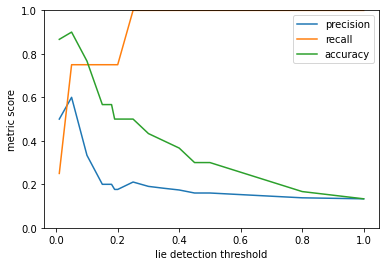

In [207]:
p = sns.lineplot(x=thresholds, y=precision)
p.set(ylim=(0,1), xlabel="lie detection threshold", ylabel="metric score")

p = sns.lineplot(x=thresholds, y=recall)
p = sns.lineplot(x=thresholds, y=accuracy)
p.legend(['precision', 'recall', 'accuracy'])

In [182]:
precision = []
recall = []
accuracy = []

for th in thresholds:
    lie_detect = []
    for i, t in enumerate(trials):
        print("TRIAL", i)
        p = check_lie_prob(n_cards, t['n_red'], t['outcome'])
        print("event prob", p)
        if p < th:
            lie_detect.append(1)
        else:
            lie_detect.append(0)
    precision.append(precision_score(as31_lies, lie_detect))
    recall.append(recall_score(as31_lies, lie_detect))
    accuracy.append(accuracy_score(as31_lies, lie_detect))
    
    # reset trial counts at end of each iteration
    n_blue_per_trial = {1: {'blue': 0, 'red': 0},
                    2: {'blue': 0, 'red': 0},
                    3: {'blue': 0, 'red': 0},
                    4: {'blue': 0, 'red': 0},
                    5: {'blue': 0, 'red': 0},
                    6: {'blue': 0, 'red': 0}}

TRIAL 0
n trials with setup 1
p blue in trial 0.14285714285714285
event prob 0.8571428571428572
TRIAL 1
n trials with setup 2
event prob 0.36734693877551017
TRIAL 2
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 3
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 4
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 5
n trials with setup 2
event prob 0.5102040816326531
TRIAL 6
n trials with setup 1
event prob 0.42857142857142855
TRIAL 7
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 8
n trials with setup 3
event prob 0.629737609329446
TRIAL 9
n trials with setup 4
event prob 0.8996251561849228
TRIAL 10
n trials with setup 5
event prob 1.1566609150949005
TRIAL 11
n trials with setup 2
event prob 0.32653061224489793
TRIAL 12
n trials with setup 3
event prob 0.3644314868804665
TRIAL 13
n trials with setup 6
event pr

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



event prob 0.7142857142857143
TRIAL 8
n trials with setup 3
event prob 0.629737609329446
TRIAL 9
n trials with setup 4
event prob 0.8996251561849228
TRIAL 10
n trials with setup 5
event prob 1.1566609150949005
TRIAL 11
n trials with setup 2
event prob 0.32653061224489793
TRIAL 12
n trials with setup 3
event prob 0.3644314868804665
TRIAL 13
n trials with setup 6
event prob 0.1652372735849858
TRIAL 14
n trials with setup 7
event prob 0.03304745471699716
TRIAL 15
n trials with setup 4
event prob 0.2603082049146189
TRIAL 16
n trials with setup 2
event prob 0.7346938775510203
TRIAL 17
n trials with setup 2
event prob 0.6122448979591837
TRIAL 18
n trials with setup 5
event prob 0.18593443208187066
TRIAL 19
n trials with setup 3
event prob 0.8396501457725947
TRIAL 20
n trials with setup 2
event prob 0.7346938775510203
TRIAL 21
n trials with setup 3
event prob 0.3498542274052478
TRIAL 22
n trials with setup 4
event prob 0.16659725114535606
TRIAL 23
n trials with setup 3
event prob 0.186588921

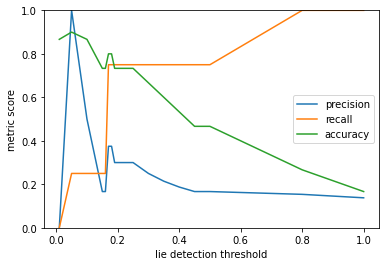

In [183]:
p = sns.lineplot(x=thresholds, y=precision)
p.set(ylim=(0,1), xlabel="lie detection threshold", ylabel="metric score")

p = sns.lineplot(x=thresholds, y=recall)
p = sns.lineplot(x=thresholds, y=accuracy)
p.legend(['precision', 'recall', 'accuracy'])

In [34]:
precision = []
recall = []
accuracy = []

for th in thresholds:
    lie_detect = []
    P = []
    for i, t in enumerate(trials):
        print("TRIAL", i)
        p = check_lie_prob_signed(n_cards, t['n_red'], t['outcome'])
        P.append(p)
        print("event prob", p)
        if p < th:
            lie_detect.append(1)
        else:
            lie_detect.append(0)
    precision.append(precision_score(as31_lies, lie_detect))
    recall.append(recall_score(as31_lies, lie_detect))
    accuracy.append(accuracy_score(as31_lies, lie_detect))
    
    # reset trial counts at end of each iteration
    n_blue_per_trial = {1: {'blue': 0, 'red': 0},
                    2: {'blue': 0, 'red': 0},
                    3: {'blue': 0, 'red': 0},
                    4: {'blue': 0, 'red': 0},
                    5: {'blue': 0, 'red': 0},
                    6: {'blue': 0, 'red': 0}}

TRIAL 0
n trials with setup 1
p blue in trial 0.14285714285714285
event prob 0.8571428571428572
TRIAL 1
n trials with setup 2
event prob 1
TRIAL 2
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 3
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 4
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 5
n trials with setup 2
event prob 0.5102040816326531
TRIAL 6
n trials with setup 1
event prob 1
TRIAL 7
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 8
n trials with setup 3
event prob 1
TRIAL 9
n trials with setup 4
event prob 1
TRIAL 10
n trials with setup 5
event prob 1
TRIAL 11
n trials with setup 2
event prob 0.32653061224489793
TRIAL 12
n trials with setup 3
event prob 0.3644314868804665
TRIAL 13
n trials with setup 6
event prob 0.1652372735849858
TRIAL 14
n trials with setup 7
event prob 0.03304745471699716
TR

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



TRIAL 28
n trials with setup 3
event prob 0.629737609329446
TRIAL 29
n trials with setup 4
event prob 0.10662224073302788
TRIAL 0
n trials with setup 1
p blue in trial 0.14285714285714285
event prob 0.8571428571428572
TRIAL 1
n trials with setup 2
event prob 1
TRIAL 2
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 3
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 4
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 5
n trials with setup 2
event prob 0.5102040816326531
TRIAL 6
n trials with setup 1
event prob 1
TRIAL 7
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 8
n trials with setup 3
event prob 1
TRIAL 9
n trials with setup 4
event prob 1
TRIAL 10
n trials with setup 5
event prob 1
TRIAL 11
n trials with setup 2
event prob 0.32653061224489793
TRIAL 12
n trials with setup 3
event prob 0.3644314868804665
TR

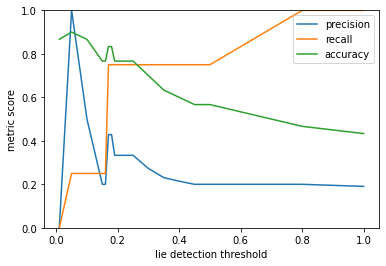

In [35]:
p = sns.lineplot(x=thresholds, y=precision)
p.set(ylim=(0,1), xlabel="lie detection threshold", ylabel="metric score")

p = sns.lineplot(x=thresholds, y=recall)
p = sns.lineplot(x=thresholds, y=accuracy)
p.legend(['precision', 'recall', 'accuracy'])

In [38]:
# with open("as31_lie_prob.csv", "w", encoding='utf-8') as f:
#     writer = csv.writer(f)
#     writer.writerow(P)

In [39]:
trials = bs11

In [40]:
n_blue_per_trial = reset_trials_count()

In [38]:
precision = []
recall = []
accuracy = []

for th in thresholds:
    lie_detect = []
    P = []
    for i, t in enumerate(trials):
        print("TRIAL", i)
        p = check_lie_prob(n_cards, t['n_red'], t['outcome'])
        P.append(p)
        print("event prob", p)
        if p < th:
            lie_detect.append(1)
        else:
            lie_detect.append(0)
    precision.append(precision_score([0 for v in bs11], lie_detect))
    recall.append(recall_score([0 for v in bs11], lie_detect))
    accuracy.append(accuracy_score([0 for v in bs11], lie_detect))
    
    # reset trial counts at end of each iteration
    n_blue_per_trial = {1: {'blue': 0, 'red': 0},
                    2: {'blue': 0, 'red': 0},
                    3: {'blue': 0, 'red': 0},
                    4: {'blue': 0, 'red': 0},
                    5: {'blue': 0, 'red': 0},
                    6: {'blue': 0, 'red': 0}}

TRIAL 0
n trials with setup 1
event prob 1
TRIAL 1
n trials with setup 2
event prob 0.7346938775510203
TRIAL 2
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 3
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 4
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 5
n trials with setup 2
event prob 0.5102040816326531
TRIAL 6
n trials with setup 1
p blue in trial 0.42857142857142855
event prob 0.5714285714285714
TRIAL 7
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 8
n trials with setup 3
event prob 0.629737609329446
TRIAL 9
n trials with setup 4
event prob 0.5397750937109537
TRIAL 10
n trials with setup 5
event prob 0.46266436603796024
TRIAL 11
n trials with setup 2
event prob 0.7346938775510203
TRIAL 12
n trials with setup 3
event prob 0.3644314868804665
TRIAL 13
n trials with setup 6
event prob 0.39656945660396

TRIAL 0
n trials with setup 1
event prob 1
TRIAL 1
n trials with setup 2
event prob 0.7346938775510203
TRIAL 2
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 3
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 4
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 5
n trials with setup 2
event prob 0.5102040816326531
TRIAL 6
n trials with setup 1
p blue in trial 0.42857142857142855
event prob 0.5714285714285714
TRIAL 7
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 8
n trials with setup 3
event prob 0.629737609329446
TRIAL 9
n trials with setup 4
event prob 0.5397750937109537
TRIAL 10
n trials with setup 5
event prob 0.46266436603796024
TRIAL 11
n trials with setup 2
event prob 0.7346938775510203
TRIAL 12
n trials with setup 3
event prob 0.3644314868804665
TRIAL 13
n trials with setup 6
event prob 0.39656945660396

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics

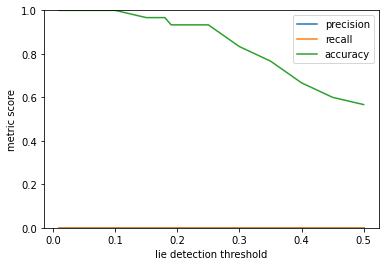

In [36]:
p = sns.lineplot(x=thresholds, y=precision)
p.set(ylim=(0,1), xlabel="lie detection threshold", ylabel="metric score")

p = sns.lineplot(x=thresholds, y=recall)
p = sns.lineplot(x=thresholds, y=accuracy)
p.legend(['precision', 'recall', 'accuracy'])

In [41]:
precision = []
recall = []
accuracy = []

for th in thresholds:
    lie_detect = []
    P = []
    for i, t in enumerate(trials):
        print("TRIAL", i)
        p = check_lie_prob_signed(n_cards, t['n_red'], t['outcome'])
        P.append(p)
        print("event prob", p)
        if p < th:
            lie_detect.append(1)
        else:
            lie_detect.append(0)
    precision.append(precision_score([0 for v in bs11], lie_detect))
    recall.append(recall_score([0 for v in bs11], lie_detect))
    accuracy.append(accuracy_score([0 for v in bs11], lie_detect))
    
    # reset trial counts at end of each iteration
    n_blue_per_trial = {1: {'blue': 0, 'red': 0},
                    2: {'blue': 0, 'red': 0},
                    3: {'blue': 0, 'red': 0},
                    4: {'blue': 0, 'red': 0},
                    5: {'blue': 0, 'red': 0},
                    6: {'blue': 0, 'red': 0}}

TRIAL 0
n trials with setup 1
event prob 1
TRIAL 1
n trials with setup 2
event prob 1
TRIAL 2
n trials with setup 1
p blue in trial 0.7142857142857143
event prob 0.2857142857142857
TRIAL 3
n trials with setup 1
p blue in trial 0.5714285714285714
event prob 0.4285714285714286
TRIAL 4
n trials with setup 1
p blue in trial 0.8571428571428571
event prob 0.1428571428571429
TRIAL 5
n trials with setup 2
event prob 0.5102040816326531
TRIAL 6
n trials with setup 1
p blue in trial 0.42857142857142855
event prob 0.5714285714285714
TRIAL 7
n trials with setup 1
p blue in trial 0.2857142857142857
event prob 0.7142857142857143
TRIAL 8
n trials with setup 3
event prob 1
TRIAL 9
n trials with setup 4
event prob 1
TRIAL 10
n trials with setup 5
event prob 1
TRIAL 11
n trials with setup 2
event prob 1
TRIAL 12
n trials with setup 3
event prob 0.3644314868804665
TRIAL 13
n trials with setup 6
event prob 1
TRIAL 14
n trials with setup 7
event prob 1
TRIAL 15
n trials with setup 4
event prob 0.26030820491

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics


event prob 1
TRIAL 12
n trials with setup 3
event prob 0.3644314868804665
TRIAL 13
n trials with setup 6
event prob 1
TRIAL 14
n trials with setup 7
event prob 1
TRIAL 15
n trials with setup 4
event prob 0.2603082049146189
TRIAL 16
n trials with setup 2
event prob 1
TRIAL 17
n trials with setup 2
event prob 1
TRIAL 18
n trials with setup 5
event prob 0.18593443208187066
TRIAL 19
n trials with setup 3
event prob 0.629737609329446
TRIAL 20
n trials with setup 2
event prob 1
TRIAL 21
n trials with setup 3
event prob 1
TRIAL 22
n trials with setup 4
event prob 1
TRIAL 23
n trials with setup 3
event prob 0.8396501457725947
TRIAL 24
n trials with setup 5
event prob 0.29749509133099306
TRIAL 25
n trials with setup 6
event prob 1
TRIAL 26
n trials with setup 4
event prob 0.4498125780924614
TRIAL 27
n trials with setup 6
event prob 1
TRIAL 28
n trials with setup 3
event prob 0.629737609329446
TRIAL 29
n trials with setup 4
event prob 0.7996668054977091
TRIAL 0
n trials with setup 1
event prob 

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


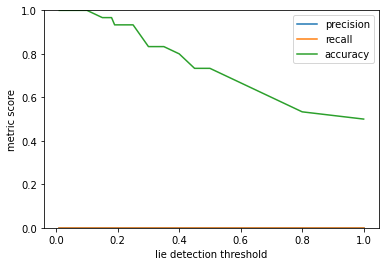

In [42]:
p = sns.lineplot(x=thresholds, y=precision)
p.set(ylim=(0,1), xlabel="lie detection threshold", ylabel="metric score")

p = sns.lineplot(x=thresholds, y=recall)
p = sns.lineplot(x=thresholds, y=accuracy)
p.legend(['precision', 'recall', 'accuracy'])

In [43]:
# with open("bs11_lie_prob.csv", "w", encoding='utf-8') as f:
#     writer = csv.writer(f)
#     writer.writerow(P)

In [119]:
rP = [max(P)-v for v in P]

In [49]:
# load normalized reverse-coded honesty ratings, i.e. normalized suspicion ratings

with open('final_pilot_sameplayer_normalized_suspicion_ratings.json', 'r') as f:
    ratings = json.load(f)

In [50]:
# load same player condition block order assignment labels

with open('same_conditions.json', 'r') as f:
    conditions = json.load(f)

In [64]:
conditions

{'54b9acd9fdf99b34ce2578f9': '11',
 '61017dbbf8b1afba48b7822e': '12',
 '6116aa4d3c4d9eae26b66171': '21',
 '6109b8238588407db4764ec1': '21',
 '611841738f4e8342f5ba3765': '21',
 '6108649840bf2b927ef3905c': '11',
 '5f4f8e8f9213e9056223e128': '22',
 '613290e8a4520dd8d0cc061a': '31',
 '61217de916b53da848302312': '32',
 '61338d61ed3f2e3d196fa7c7': '31'}

In [134]:
tmp = [ratings['61338d61ed3f2e3d196fa7c7'][k] for k in ratings['61338d61ed3f2e3d196fa7c7'].keys()]

In [135]:
list(zip(tmp[60:], rP))

[(0.8333333333, 0),
 (0.1666666667, 0),
 (0.1666666667, 0.7142857142857143),
 (0.1666666667, 0.5714285714285714),
 (0.0, 0.8571428571428571),
 (0.1666666667, 0.4897959183673469),
 (0.0, 0.4285714285714286),
 (0.5, 0.2857142857142857),
 (0.0, 0),
 (0.0, 0),
 (0.0, 0),
 (0.1666666667, 0),
 (0.1666666667, 0.6355685131195334),
 (0.6666666667, 0),
 (1.0, 0),
 (0.1666666667, 0.7396917950853811),
 (0.5, 0),
 (0.0, 0),
 (0.1666666667, 0.8140655679181293),
 (0.0, 0.370262390670554),
 (0.0, 0),
 (0.5, 0),
 (0.6666666667, 0),
 (0.3333333333, 0.16034985422740533),
 (0.0, 0.7025049086690069),
 (0.6666666667, 0),
 (0.0, 0.5501874219075387),
 (0.0, 0),
 (0.0, 0.370262390670554),
 (0.3333333333, 0.20033319450229092)]

<AxesSubplot:>

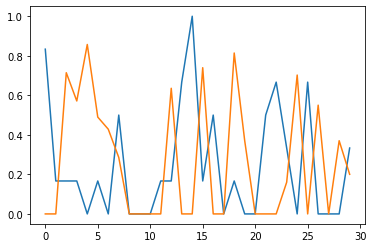

In [136]:
sns.lineplot(data=tmp[60:])
sns.lineplot(data=rP)

In [79]:
bs11.iloc[27]

n_red                            2.000000
outcome                         -1.000000
trial                           28.000000
n_blue                           5.000000
e_v                             -0.714286
normed_signed_e_v                0.090909
normed_unsigned_e_v              0.857143
cs_signed_e_v                    0.857143
normed_cs_signed_e_v             0.470588
cs_unsigned_e_v                 10.285714
normed_cs_unsigned_e_v           0.948052
n_reported_colour_opp           15.000000
n_consec_colour                  1.000000
normed_signed_colour_count       0.300000
normed_unsigned_colour_count     0.285714
Name: 27, dtype: float64

In [88]:
precision = []
recall = []
accuracy = []

for th in thresholds:
    lie_detect = []
    P = []
    for i, t in enumerate(trials):
        print("TRIAL", i)
        p = check_lie_prob_signed(n_cards, t['n_red'], t['outcome'])
        P.append(p)
        print("event prob", p)
        if p < th:
            lie_detect.append(1)
        else:
            lie_detect.append(0)
    precision.append(precision_score([0 for v in bs11], lie_detect))
    recall.append(recall_score([0 for v in bs11], lie_detect))
    accuracy.append(accuracy_score([0 for v in bs11], lie_detect))
    
    # reset trial counts at end of each iteration
    n_blue_per_trial = {1: {'blue': 0, 'red': 0},
                    2: {'blue': 0, 'red': 0},
                    3: {'blue': 0, 'red': 0},
                    4: {'blue': 0, 'red': 0},
                    5: {'blue': 0, 'red': 0},
                    6: {'blue': 0, 'red': 0}}

TRIAL 0
n trials with setup 8
event prob 1
TRIAL 1
n trials with setup 9
event prob 1
TRIAL 2
n trials with setup 7
event prob 1.0624824690392607
TRIAL 3
n trials with setup 5
event prob 0.6854286904266077
TRIAL 4
n trials with setup 4
event prob 0.8996251561849228
TRIAL 5
n trials with setup 8
event prob 0.9757492062605457
TRIAL 6
n trials with setup 5
event prob 0.28916522877372514
TRIAL 7
n trials with setup 7
event prob 0.1274978962847113
TRIAL 8
n trials with setup 10
event prob 1
TRIAL 9
n trials with setup 11
event prob 1
TRIAL 10
n trials with setup 12
event prob 1
TRIAL 11
n trials with setup 6
event prob 1
TRIAL 12
n trials with setup 9
event prob 0.8712046484469159
TRIAL 13
n trials with setup 13
event prob 1
TRIAL 14
n trials with setup 14
event prob 1
TRIAL 15
n trials with setup 10
event prob 0.7605754867393711
TRIAL 16
n trials with setup 6
event prob 1
TRIAL 17
n trials with setup 8
event prob 1
TRIAL 18
n trials with setup 11
event prob 0.6519218457766038
TRIAL 19
n tr

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\sklearn\metrics

In [45]:
rP = [1-v for v in P]

In [46]:
rP

[0,
 0,
 0.7142857142857143,
 0.5714285714285714,
 0.8571428571428571,
 0.4897959183673469,
 0.4285714285714286,
 0.2857142857142857,
 0,
 0,
 0,
 0,
 0.6355685131195334,
 0,
 0,
 0.7396917950853811,
 0,
 0,
 0.8140655679181293,
 0.370262390670554,
 0,
 0,
 0,
 0.16034985422740533,
 0.7025049086690069,
 0,
 0.5501874219075387,
 0,
 0.370262390670554,
 0.20033319450229092]

<AxesSubplot:>

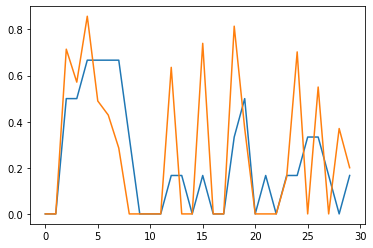

In [95]:
sns.lineplot(data=tmp[:30])
sns.lineplot(data=rP)